# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "https://api.openweathermap.org/data/2.5/weather?q=" 
units = "imperial"

citydata = []

i = 0

for city in cities:
    i = i + 1
    url = base_url + city + "&appid=" + weather_api_key + "&units=" + units
    try:
        response = requests.get(url).json()
        temperature= response["main"]["temp"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        humidity = response["main"]["humidity"]
        wind_speed = response["wind"]["speed"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        citydata.append({"City": city,
                         "Country": country,
                         "Date": date,
                        "Temperature": temperature,
                        "Latitude": latitude,
                        "Longitude": longitude,
                        "Humidity": humidity,
                        "Wind Speed": wind_speed,
                        "Cloudiness": cloudiness,})
        
        print(f'City {i}|{city}')
        
        time.sleep(.08)
    
#If no city data is found, print 'No City Data Found' and create an exception to pass to the next city (i)
    
    except:
        print(f'No City Data Found')
        pass

City 1|punta arenas
City 2|cayenne
City 3|ourossogui
No City Data Found
City 5|wajima
City 6|arraial do cabo
City 7|ushuaia
City 8|atuona
City 9|castro
City 10|makakilo city
City 11|dakar
City 12|tuatapere
City 13|broome
City 14|rovaniemi
City 15|sistranda
City 16|bredasdorp
City 17|nyurba
City 18|east london
City 19|mabaruma
City 20|bluff
City 21|kandrian
City 22|ossora
No City Data Found
City 24|gunjur
City 25|fecamp
City 26|coquimbo
City 27|saint-philippe
City 28|pimampiro
City 29|la ronge
City 30|barrow
City 31|san carlos de bariloche
City 32|saldanha
City 33|tuktoyaktuk
City 34|talnakh
City 35|vung tau
City 36|mataura
City 37|smithers
City 38|atambua
City 39|namibe
City 40|geraldton
City 41|mapastepec
City 42|samarai
City 43|chokurdakh
City 44|batticaloa
City 45|dzhankoy
City 46|mar del plata
No City Data Found
City 48|chapais
City 49|lavrentiya
City 50|pangnirtung
City 51|rikitea
City 52|oyama
City 53|hermanus
City 54|kenora
City 55|diamantino
No City Data Found
City 57|kochetok


City 460|huarmey
City 461|sigli
City 462|chatra
City 463|kudahuvadhoo
City 464|porto velho
City 465|anadyr
City 466|puri
City 467|vestmannaeyjar
City 468|walvis bay
No City Data Found
City 470|petropavlovsk-kamchatskiy
City 471|kargil
City 472|kuusamo
City 473|yar-sale
No City Data Found
City 475|balaguer
City 476|san rafael del sur
City 477|sfantu gheorghe
City 478|abaza
No City Data Found
City 480|ukiah
City 481|vostok
City 482|camana
City 483|batagay-alyta
City 484|canakkale
City 485|krivosheino
City 486|carbonia
City 487|neuquen
City 488|whitianga
City 489|menongue
City 490|deputatskiy
City 491|palana
City 492|maposeni
City 493|lyubashivka
City 494|dombarovskiy
City 495|igrim
City 496|manjacaze
City 497|hauterive
City 498|vryburg
City 499|tamworth
No City Data Found
City 501|mongo
City 502|revda
City 503|grenaa
City 504|ixtapa
City 505|maturin
City 506|kishi
City 507|ribeira grande
City 508|marsh harbour
City 509|acapulco
City 510|dalgopol
City 511|iqaluit
City 512|weyburn
City 513

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
citydata_df = pd.DataFrame(citydata)
citydata_df.head()

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloudiness
0,punta arenas,CL,1588134847,28.40,-53.15,-70.92,92,5.03,40
1,cayenne,GF,1588134848,75.20,4.93,-52.33,100,8.93,98
2,ourossogui,SN,1588134848,87.80,15.61,-13.32,33,4.70,50
3,wajima,JP,1588134849,64.40,37.40,136.90,48,19.46,7
4,arraial do cabo,BR,1588134849,72.55,-22.97,-42.03,80,9.84,0


In [41]:
citydata_df.to_csv('citydata.csv') 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

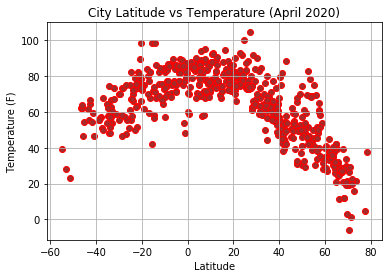

In [22]:
plt.scatter(citydata_df["Latitude"], citydata_df["Temperature"], marker="o", facecolors="brown", edgecolors="red")

plt.title("City Latitude vs Temperature (April 2020)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Temperature.png", dpi= 150)
plt.show()

#### Latitude vs. Humidity Plot

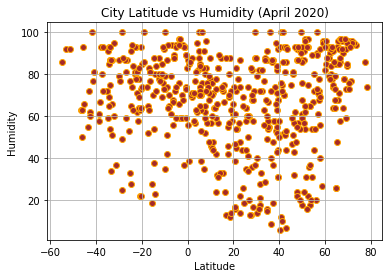

In [21]:
plt.scatter(citydata_df["Latitude"], citydata_df["Humidity"], marker = "o", facecolors='brown', edgecolors = 'orange')

plt.title("City Latitude vs Humidity (April 2020)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Humidity.png", dpi= 150)
plt.show()

#### Latitude vs. Cloudiness Plot

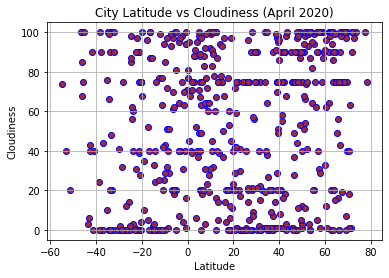

In [23]:
plt.scatter(citydata_df["Latitude"], citydata_df["Cloudiness"], marker = "o", facecolors='brown', edgecolors = 'blue')

plt.title("City Latitude vs Cloudiness (April 2020)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Cloudiness.png", dpi= 150)
plt.show()

#### Latitude vs. Wind Speed Plot

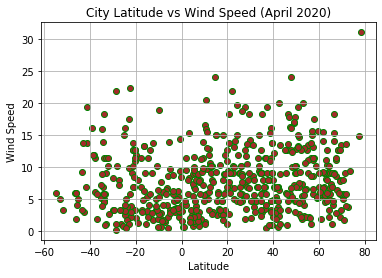

In [24]:
plt.scatter(citydata_df["Latitude"], citydata_df["Wind Speed"], marker = "o", facecolors='brown', edgecolors = 'green')

plt.title("City Latitude vs Wind Speed (April 2020)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_WindSpeed.png", dpi= 150)
plt.show()

## Linear Regression

In [6]:
# OPTIONAL: Create a function to create Linear Regression plots


In [7]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression